In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('./relabeled_data.csv')
df['label'] = df['filename'].apply(lambda x: x.split('.')[0])

In [2]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


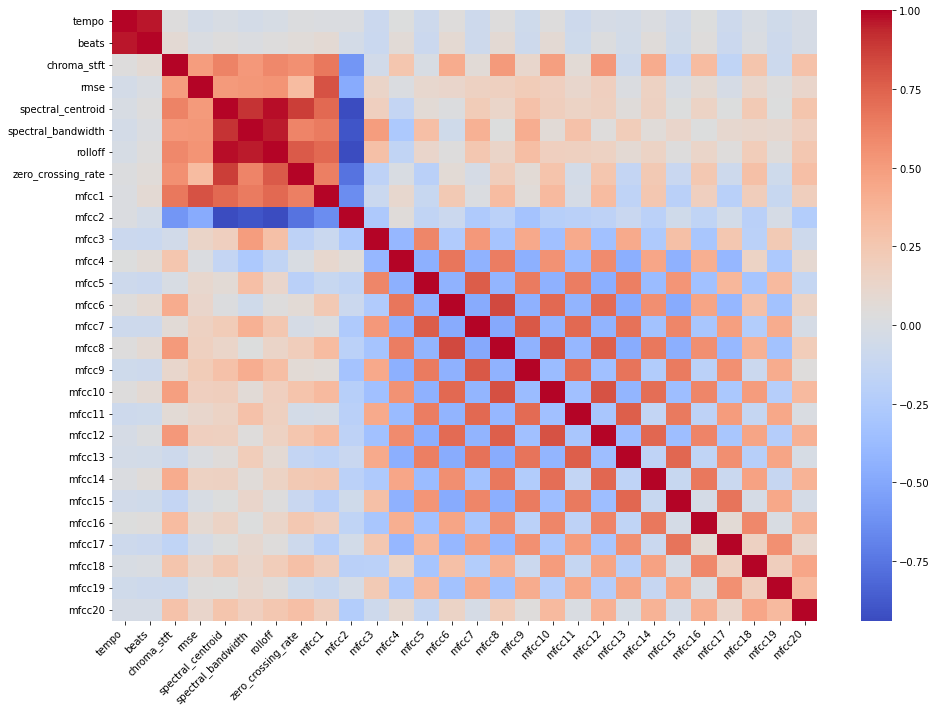

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
features_data = df.drop(['filename', 'label'], axis=1)
# Calculating the correlation matrix
corr = features_data.corr()
# Setting up the matplotlib figure
plt.figure(figsize=(14, 10))
# Drawing the heatmap
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm')
# Adjusting the plot to make it more readable
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
# Showing the plot
plt.show()


In [4]:
import numpy as np
# Create a correlation matrix
corr_matrix = features_data.corr().abs()
# Modified line without deprecation warning
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
highly_correlated_pairs = [(row, col) for col in to_drop for row in upper.index if upper.loc[row, col] > 0.9]
for i in highly_correlated_pairs:
    print(i)

('tempo', 'beats')
('spectral_centroid', 'spectral_bandwidth')
('spectral_centroid', 'rolloff')
('spectral_bandwidth', 'rolloff')
('spectral_centroid', 'mfcc2')
('rolloff', 'mfcc2')


In [5]:
# Based on our analysis, we drop 'tempo', 'spectral_centroid', and 'rolloff'
features_to_drop = ['tempo', 'spectral_centroid', 'rolloff']
reduced_data = df.drop(features_to_drop, axis=1)
# Now let's see the remaining features
reduced_data.head()

,filename,beats,chroma_stft,rmse,spectral_bandwidth,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,50,0.380260,0.248262,1956.611056,0.127272,-26.929785,107.334008,-46.809993,40.932634,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,44,0.306451,0.113475,1497.668176,0.058613,-233.860772,136.170239,3.289490,48.931193,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,75,0.253487,0.151571,1973.643437,0.042967,-221.802549,110.843070,18.620984,30.922996,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,91,0.269320,0.119072,1567.804596,0.069124,-207.208080,132.799175,-15.438986,60.986727,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,74,0.391059,0.137728,2052.332563,0.075480,-145.434568,102.829023,-12.517677,56.993472,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [6]:
from sklearn.model_selection import train_test_split

# Dropping non-feature columns and labels to form the feature set X
X = reduced_data.drop(['filename', 'label'], axis=1)
# Labels
y = reduced_data['label']

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the resulting sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((800, 25), (200, 25), (800,), (200,))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
# Initialize the StandardScaler
#scaler = StandardScaler()
#scaler = RobustScaler()
scaler = QuantileTransformer(n_quantiles=min(800, len(X_train)))
# Fit on training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the models with default parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}
# Dictionary to hold accuracy scores for each model
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
# Display the accuracy scores for all models
accuracy_scores

Logistic Regression Accuracy: 0.5750
SVM Accuracy: 0.6200
Decision Tree Accuracy: 0.4150
Random Forest Accuracy: 0.5750


{'Logistic Regression': 0.575,
 'SVM': 0.62,
 'Decision Tree': 0.415,
 'Random Forest': 0.575}

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

C_range = np.linspace(0.01, 10, 20)
gamma_range = np.logspace(-9, 3, 13)
kernel_range = ['linear', 'rbf', 'poly']

# Update the parameter grid with the new C_range, gamma_range, and kernel_range
param_grid_svm = {
    'C': C_range,
    'gamma': gamma_range,
    'kernel': kernel_range
}
# Initialize the SVM model
svm_model = SVC()

# Initialize the GridSearchCV object with the new param_grid
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=10, scoring='accuracy', verbose=1)

# Perform the grid search on the scaled training data
grid_search_svm.fit(X_train, y_train)

# Best parameters and best score with fine-grained C, gamma, and kernel
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_
best_params_svm, best_score_svm

Fitting 10 folds for each of 780 candidates, totalling 7800 fits


({'C': 2.6389473684210527, 'gamma': 1.0, 'kernel': 'rbf'}, 0.6962499999999999)

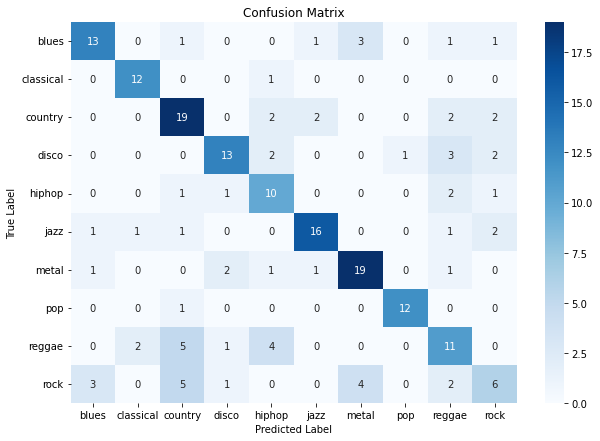

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model with the specified parameters
model = SVC(**best_params_svm)
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_names = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
# Then update your plotting code with these labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

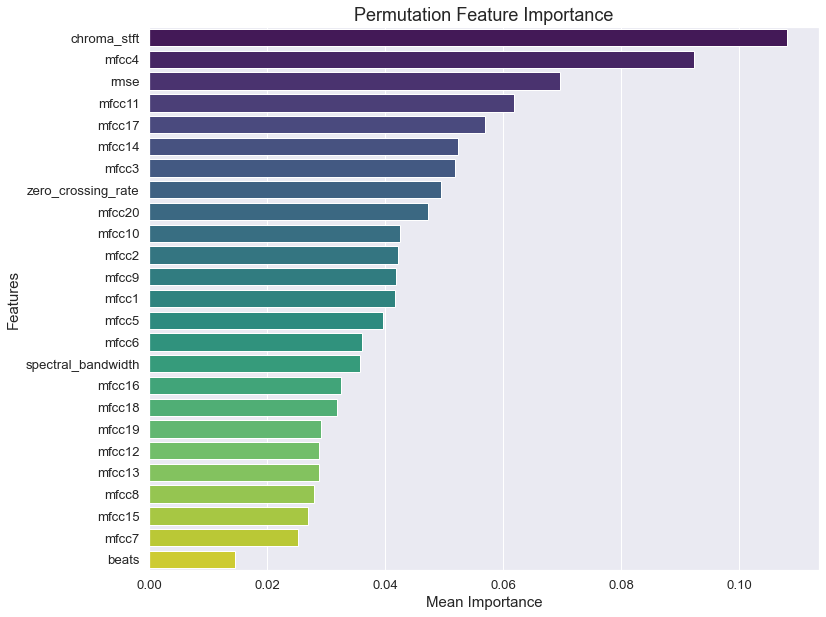

In [10]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=50, random_state=42)
feature_importance = pd.DataFrame(result.importances_mean, index=X.columns.tolist(), columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(12, 10)) 
sns.set(font_scale=1.2) 
sns.barplot(x='importance', y=feature_importance.index, data=feature_importance, palette='viridis')
plt.xlabel('Mean Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Permutation Feature Importance', fontsize=18)
plt.show()


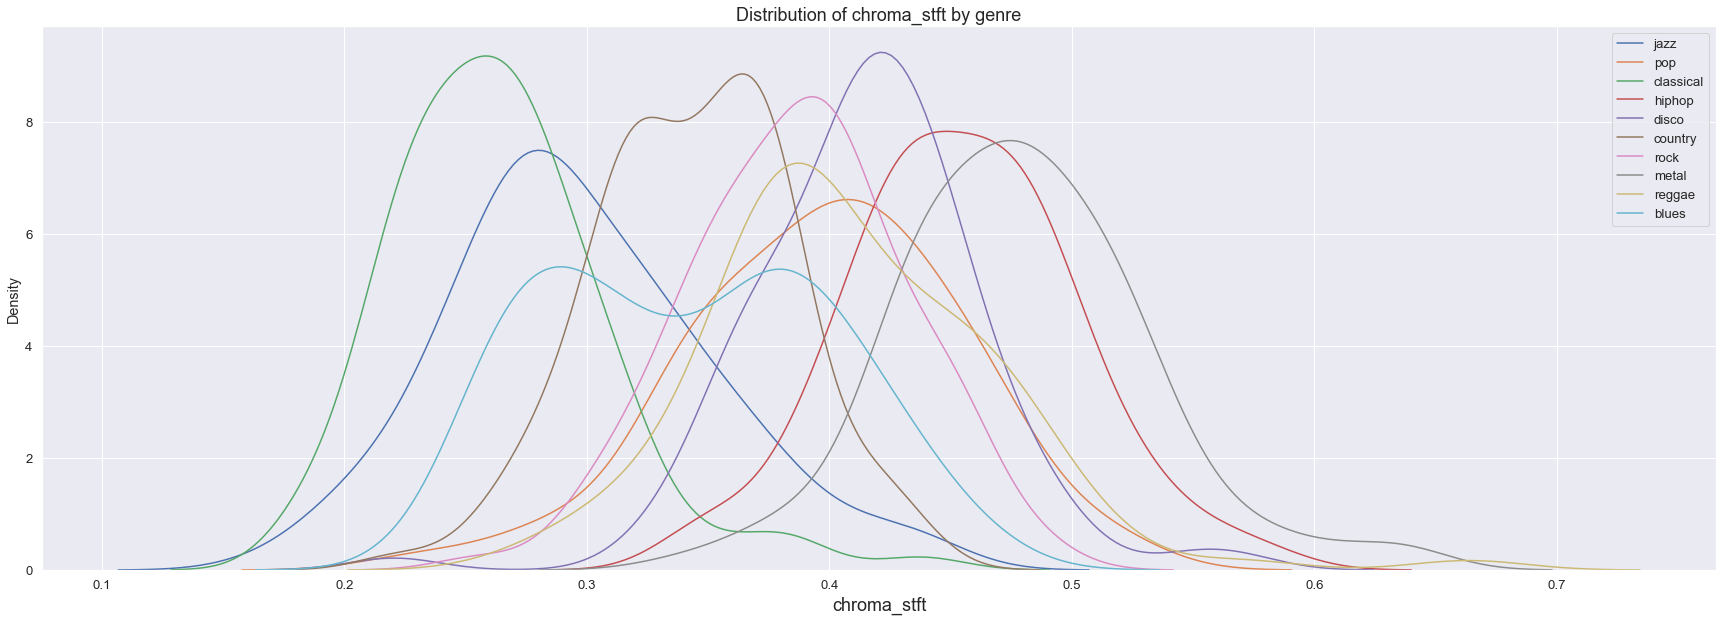

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_genre_mfcc(data, tempo_col='tempo', genres=['jazz', 'pop', 'classical', 'hiphop', 'disco', 'country', 'rock', 'metal', 'reggae', 'blues'], figsize=(30, 10)):
    plt.figure(figsize=figsize)

    for genre in genres:
        sns.kdeplot(data=data.loc[data['label'] == genre, tempo_col], label=genre)

    plt.title("Distribution of chroma_stft by genre", fontsize=18)
    plt.xlabel("chroma_stft", fontsize=18)
    plt.legend()

# Example usage with a custom tempo column 'custom_tempo'
plot_genre_mfcc(reduced_data, tempo_col='chroma_stft')
plt.show()

In [12]:
from sklearn.metrics import classification_report
# Assume 'y_test' are the true labels and 'y_pred' are the predictions from your model
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
# Convert the report to a DataFrame for easier viewing
class_report_df = pd.DataFrame(report).transpose()
class_accuracy = class_report_df['precision']  # 'precision' is the accuracy per class for our purpose
# Print the accuracy for each genre
print(class_accuracy)

blues           0.722222
classical       0.800000
country         0.575758
disco           0.722222
hiphop          0.500000
jazz            0.800000
metal           0.730769
pop             0.923077
reggae          0.478261
rock            0.428571
accuracy        0.655000
macro avg       0.668088
weighted avg    0.654629
Name: precision, dtype: float64
